In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

ipl = pd.read_csv('/content/ipl_data.csv')
ipl.head()

,mid,date,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [3]:
#Dropping certain features
df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)

X = df.drop(['total'], axis =1)
y = df['total']

batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])

In [4]:
# Train test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
# Define the neural network model and Compile the model with Huber loss
model = keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(216, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])

huber_loss = tf.keras.losses.Huber(delta=1.0)  # You can vary the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss)

In [8]:
model.fit(X_train_scaled, y_train, epochs=15, batch_size=64, validation_data=(X_test_scaled, y_test))

Epoch 1/15
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 57.3404 - val_loss: 22.5290
Epoch 2/15
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 22.3873 - val_loss: 22.1350
Epoch 3/15
832/832 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - loss: 22.5791 - val_loss: 22.2102
Epoch 4/15
832/832 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 22.5595 - val_loss: 22.4000
Epoch 5/15
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 22.6283 - val_loss: 22.3170
Epoch 6/15
832/832 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 22.5811 - val_loss: 22.1347
Epoch 7/15
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 22.4999 - val_loss: 22.1149
Epoch 8/15
832/832 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 22.2518 - val_loss: 22.2066
Epoch 9/15
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 22.4537 - val_loss: 22.1274
Epoch 10/15
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 22.4697 - val_loss: 22.2424
Epoch 11/15
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 22.3894 - val_loss: 22.1147
Epoch 12/15
832/832 ━━━━━━━━

713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


23.004815698584768

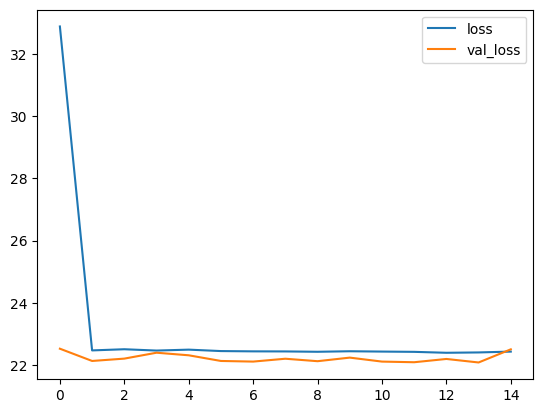

In [10]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

predictions = model.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)

In [11]:
def predict_score():
    batting_team = input("Enter the Batting Team: ")
    bowling_team = input("Enter the  Bowling Team: ")
    striker = input("Enter Striker: ")
    bowler = input("Enter Bowler: ")
    encoded_batting_team = batting_team_encoder.transform([batting_team])
    encoded_bowling_team = bowling_team_encoder.transform([bowling_team])
    encoded_striker = striker_encoder.transform([striker])
    encoded_bowler = bowler_encoder.transform([bowler])
    input_data = np.array([encoded_batting_team[0], encoded_bowling_team[0], encoded_striker[0], encoded_bowler[0]])
    input_data = input_data.reshape(1, -1)
    # Scale the input data
    input_data_scaled = scaler.transform(input_data)
    predicted_score = model.predict(input_data_scaled)
    print(f"Predicted Score: {predicted_score[0][0]}")
predict_score()

Enter the Batting Team: Royal Challengers Bangalore
Enter the  Bowling Team: Rajasthan Royals
Enter Striker: DW Steyn
Enter Bowler: SR Watson
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Score: 164.7686767578125


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
